In [23]:
import pandas as pd
from src.dataset import Dataset
from src.kaggle import Kaggle
from src.visualization import LinearPlot, HistPlot, BarPlot
from src.decision_tree import DecisionTree

# Run python tests:
python -m unittest discover -p '*_test.py' tests

In [24]:
# DOWNLOAD
k = Kaggle()
k.authenticate().download_data()

Authenticated
Finished downloading...


In [25]:
# loading    
d = Dataset()
d.load_from_csv().drop_missing_values().truncate_data().save_data_to_csv()

In [26]:
# perform preprocessing
d.add_day_of_week().add_month_of_year().add_words_count()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


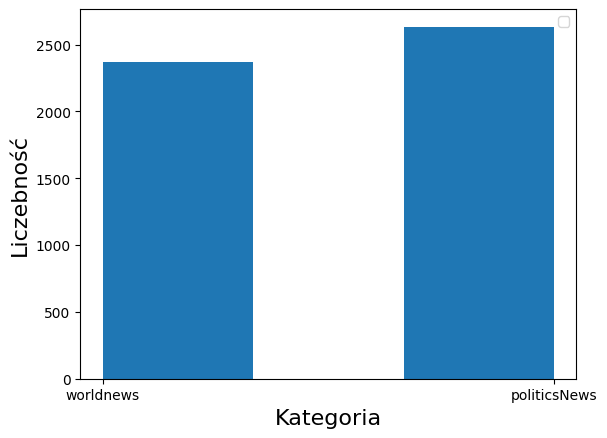

saving: 


In [27]:

result = d.prepare_category_comparision()
hp = HistPlot().plot(x=result, 
                     y=d.data["subject"], 
                     bins=3, 
                     xlabel="Kategoria",
                     ylabel="Liczebność")

/Users/sebastiansukiennik/Desktop/zpwp/project-new/src/dataset.py:132: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = self.data.groupby(["day_of_week", "is_true"]).size().unstack().fillna(0)


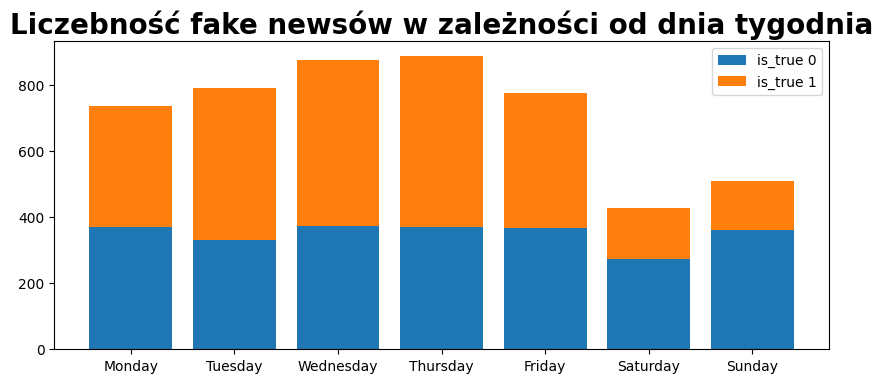

saving: Liczebność fake newsów w zależności od dnia tygodnia


<Axes: title={'center': 'Liczebność fake newsów w zależności od dnia tygodnia'}>

In [28]:


result = d.prepare_daily_comparison()
BarPlot().plot(data=result, title="Liczebność fake newsów w zależności od dnia tygodnia")

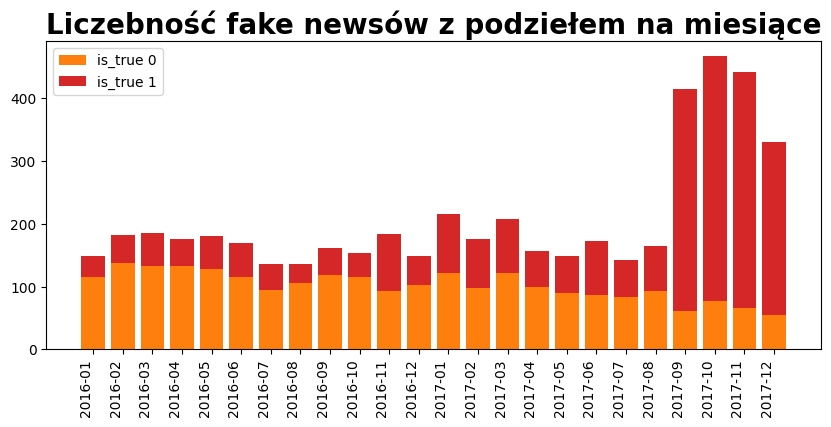

saving: Liczebność fake newsów z podziełem na miesiące


<Axes: title={'center': 'Liczebność fake newsów z podziełem na miesiące'}>

In [29]:
# def prepare_monthly_comparison(data: pd.DataFrame):
#     data = data.loc[data["datetime"].dt.year != 2015]
#     data["month"] = data["datetime"].dt.to_period("M")
#     result = data.groupby(["month", "is_true"]).size().unstack().fillna(0)
    
#     return result

result = d.prepare_monthly_comparison()
BarPlot().plot(data=result, title="Liczebność fake newsów z podziełem na miesiące")

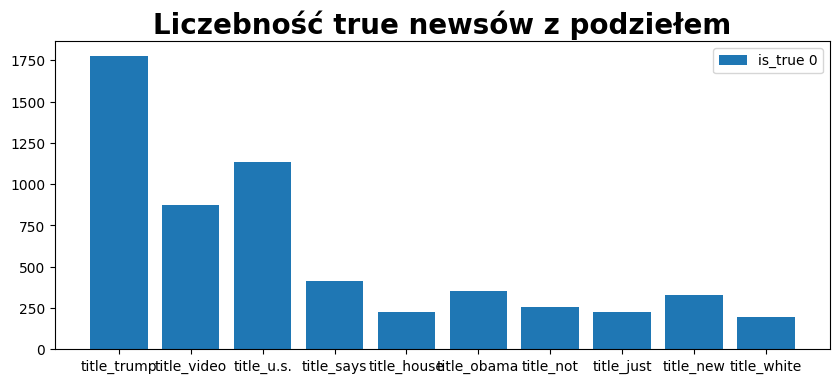

saving: Liczebność true newsów z podziełem


<Axes: title={'center': 'Liczebność true newsów z podziełem'}>

In [30]:
result = d.prepare_title_word_count()
BarPlot().plot(data=result, title="Liczebność true newsów z podziełem")

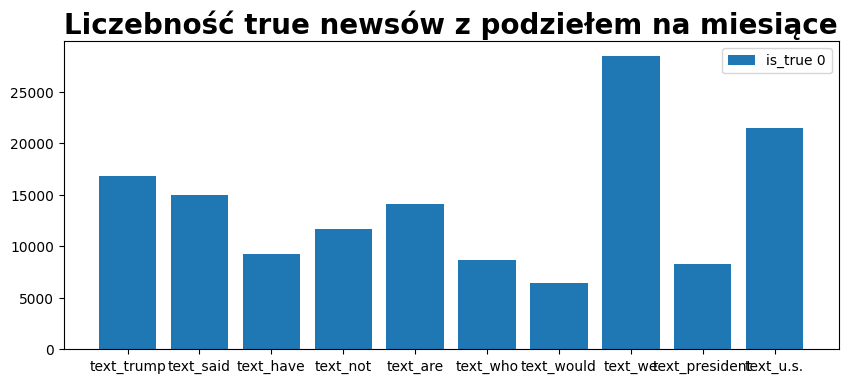

saving: Liczebność true newsów z podziełem na miesiące


<Axes: title={'center': 'Liczebność true newsów z podziełem na miesiące'}>

In [31]:
result = d.prepare_text_word_count()
BarPlot().plot(data=result, title="Liczebność true newsów z podziełem na miesiące")

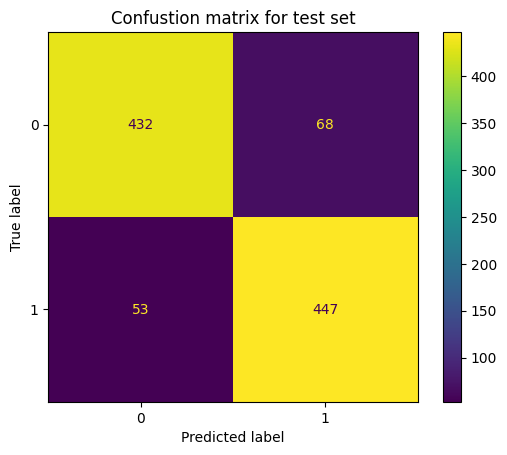

DecisionTree(accuracy: 0.879, precission: 0.868, recall: 0.894)


In [32]:
d.data = d.data.drop(columns=['title', 'month', 'text', 'subject', 'date', 'datetime', 'weekday', 'day_of_week'])
train_X, test_X, train_y, test_y = d.get_train_test()

dt = DecisionTree()
dt.fit(train_X, train_y)
pred_y = dt.predict(test_X, test_y)
DecisionTree.plot_confusion_matrix(test_y, pred_y, set_type="test")

print(dt)